**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `dir_montar` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
dir_montar=<ruta completa de mi máquina a mi directorio>#aquí colocar la ruta al directorio a montar, por ejemplo: 
#dir_montar=/Users/erick/midirectorio.
```

Ejecutar:

```
$docker run --rm -v $dir_montar:/datos --name jupyterlab_prope_r_kernel_tidyverse -p 8888:8888 -d palmoreck/jupyterlab_prope_r_kernel_tidyverse:3.0.16   

```

Ir a `localhost:8888` y escribir el password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_prope_r_kernel_tidyverse
```


Documentación de la imagen de docker `palmoreck/jupyterlab_prope_r_kernel_tidyverse:3.0.16` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/prope_r_kernel_tidyverse).

---

Para ejecución de la nota usar:

[docker](https://www.docker.com/) (instalación de forma **local** con [Get docker](https://docs.docker.com/install/)) y ejecutar comandos que están al inicio de la nota de forma **local**. 

O bien dar click en alguno de los botones siguientes:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/palmoreck/dockerfiles-for-binder/jupyterlab_prope_r_kernel_tidyerse?urlpath=lab/tree/Propedeutico/R/clases/3_estadistica/2_distribuciones_comunes.ipynb) esta opción crea una máquina individual en un servidor de Google, clona el repositorio y permite la ejecución de los notebooks de jupyter.

[![Run on Repl.it](https://repl.it/badge/github/palmoreck/dummy)](https://repl.it/languages/Rlang) esta opción no clona el repositorio, no ejecuta los notebooks de jupyter pero permite ejecución de instrucciones de Python de forma colaborativa con [repl.it](https://repl.it/). Al dar click se crearán nuevos ***repl*** debajo de sus users de ***repl.it***.


### Lo siguiente está basado en los libros:

### * B. Rumbos, Pensando Antes de Actuar: Fundamentos de Elección Racional, 2009

### * G. J. Kerns, Introduction to Probability and Statistics Using R, 2014.

### El libro de G. J. Kerns tiene github: [jkerns/IPSUR](https://github.com/gjkerns/IPSUR)


**Nota:**

* En algunas líneas no es necesario colocar `print` y sólo se ha realizado para mostrar los resultados de las funciones en un formato similar al de R pues la nota se escribió con *jupyterlab* y *R*.

In [1]:
library(ggplot2)

In [2]:
options(repr.plot.width=5, repr.plot.height=5) #esta línea sólo se ejecuta para jupyterlab con R

# Motivación

En el análisis estadístico de datos de poblaciones aparecen ciertas distribuciones con mucha frecuencia. En lo que continúa se estudiarán tres de las más comunes: la distribución uniforme (discreta y continua), que representa datos equiprobables, la distribución binomial y la distribución normal, que están íntimamente relacionadas y podemos pensar a la segunda (normal) como la versión continua de la primera (binomial). Ésta última es muy importante en la práctica y en la teoría.

Si $X$ es una variable aleatoria con función de distribución -o densidad en el caso continuo- $f$, entonces decimos que los datos representados por los valores que toma $X$ tienen una distribución dada por $f$.

## Caso discreto

En el caso discreto, en el cual $X$ toma valores $x_1,x_2,\dots,x_n$ (soporte de $X$, $S_X$), éstos representan datos con media: $$\mu = E(X) = \displaystyle \sum_{i=1}^nx_if(x_i)$$

en donde, recordemos que $f(x_i) = P(X = x_i)$ es la probabilidad de que $X$ tome el valor $X_i$. Asimismo, la varianza está dada por: $$\sigma^2=E((X-\mu)^2) = \sum_{i=1}^n(x_i-\mu)^2f(x_i)$$

que es el valor esperado de las desviaciones -al cuadrado- alrededor de la media. Decimos que la distribución $f$ tiene media $\mu$ y varianza $\sigma^2$. Claramente la desviación estándar es simplemente $\sigma = \sqrt{\sigma^2}$.


---

**Observación**

La varianza de una variable aleatoria puede ser calculada con la fórmula: $\sigma^2 = E(X^2)-(E(X))^2$.

---

## Caso continuo

En el caso continuo, en el cual $X$ toma valores en un intervalo de la forma $[a,b]$ o $(a,b)$ (soporte de $X$, $S_X$) o uniones de estos intervalos, éstos representan datos con media: $$\mu=E(X)=\displaystyle \int_{X \in S_X}xf(x)dx.$$

si $\displaystyle \int_{X \in S_X}|x|f(x)dx < \infty$ (es finita).

Asimismo, la varianza está dada por: $$\sigma^2=E((X-\mu)^2) = \int_{X \in S_X}(x-\mu)^2f(x)dx,$$

y la desviación estándar es: $\sigma = \sqrt{\sigma^2}$.

# Uniforme

Cuando los datos de un conjunto **ocurren, cada uno con la misma frecuencia**, decimos que están uniformemente distribuidos. Éste es el caso de la distribución de probabilidad determinada por una **variable aleatoria sobre un espacio muestral de datos equiprobables**. Por ejemplo, los que resultan de lanzar una moneda, lanzar un dado, girar una ruleta o bien, elegir un número al azar en el intervalo $[0, 1]$. La distribución que resulta, ya sea en el caso discreto o continuo, se conoce como distribución uniforme.

## Su distribución de probabilidad: caso discreto

En el caso discreto, dada una variable aleatoria $X$ que toma valores $\{1, 2, \dots , n\}$, cada uno con probabilidad $\frac{1}{n}$ , la distribución de probabilidad está dada por: $$f(i) = P(X=i)= \frac{1}{n} \forall i=1,2,\dots,n.$$

## Su gráfica

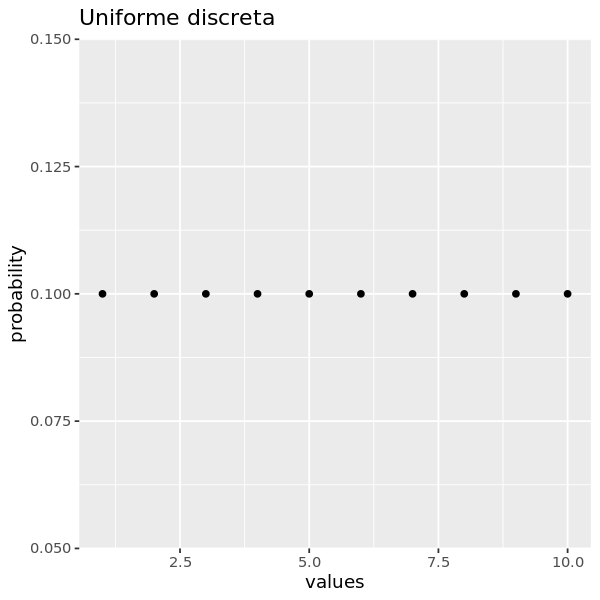

In [3]:
n <- 10
values <- 1:n
probability <- 0.1
qplot(values,probability,main='Uniforme discreta') #qplot is quick plot

## Propiedades

* $\mu = \displaystyle \sum_{i=1}^ni\frac{1}{n} = \frac{n+1}{2}$.

* $\sigma = \sqrt{\displaystyle \sum_{i=1}^n(i-\mu)^2\frac{1}{n}} = \sqrt{\frac{n^2-1}{12}}$.

## Su función de densidad: caso continuo

Para el caso continuo, considérese el caso de elegir un número al azar en el intervalo $[a,b]$ de la recta numérica. Sea $X$ la variable aleatoria asociada que toma cada uno de los valores del intervalo. La densidad de probabilidad correspondiente debe ser tal que el área bajo la gráfica sea la unidad y dados números $c$ y $d$ en el intervalo $[a, b]$, con $c < d$, la probabilidad: $$P(c < X < d) = \frac{d-c}{b-a}$$ es el área por debajo de la gráfica entre $c$ y $d$. 

Podemos definir esta función de densidad como: $$f(x) = \begin{cases}
\frac{1}{b-a} & \text{si } a \leq x \leq b,\\
0 & \text{en otro caso}
\end{cases}$$

La media y varianza están dadas por: $$\mu=\frac{a+b}{2},$$

$$\sigma^2=\frac{(b-a)^2}{12}.$$

## Su gráfica

In [4]:
set.seed(2000)
n_runif<-500 #number of values
a <- -2 #left point of interval
b <- 3 #right point of interval
vec <- seq(a,b,by=.01)
dunif_value <- dunif(vec,a,b) #evaluating density function in vec
                    #this evaluation is equal to 1/(b-a)
df <- data.frame(valores=vec,probabilidad=dunif_value)
gf <- ggplot(df, aes(x=vec,y=probabilidad))

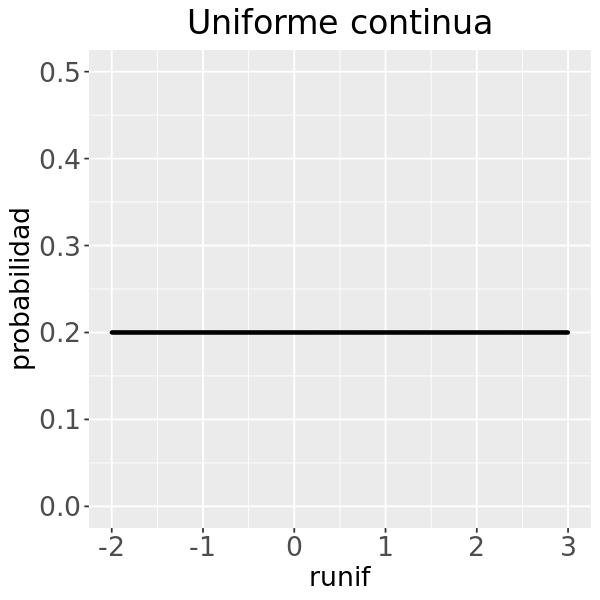

In [5]:
gf + geom_point(size=.5) + ylim(0, 1/(b-a)+.3)+
ggtitle('Uniforme continua')+
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('runif')

El área debajo de la curva es: $$(b-a)\frac{1}{b-a} = 1.$$

Y la probabilidad de que $X$ esté entre $0$ y $2$ es el área formada en el rectángulo:

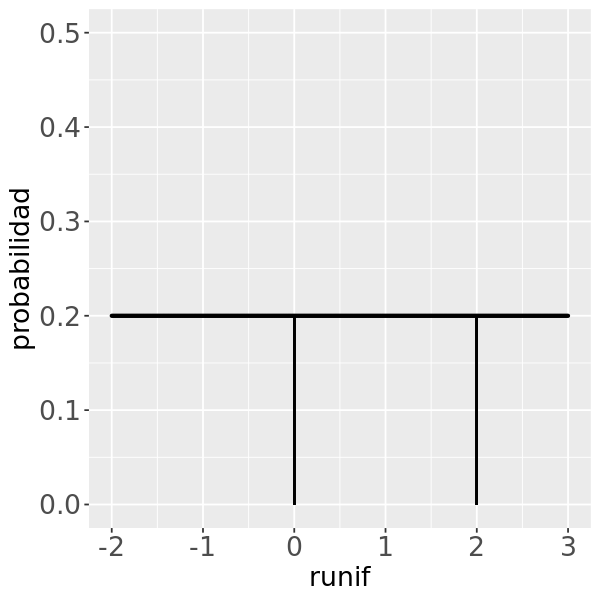

In [6]:
gf + geom_point(size=.5) + ylim(0, 1/(b-a)+.3) +
geom_segment(aes(x = 0, y = 0, xend = 0, yend = 1/(b-a))) +
geom_segment(aes(x = 2, y = 0, xend = 2, yend = 1/(b-a))) +
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('runif')

### Ejemplos

1) Sea $X$ la variable aleatoria uniforme que representa el resultado observado al lanzar un dado. La probabilidad de observar del número $3$ en adelante es de: $$P(X\geq 3) = \displaystyle \sum_{i=3}^6P(X=i)=\sum_{i=3}^6\frac{1}{6}=\frac{4}{6}=\frac{2}{3}.$$

El lanzamiento medio es de: $$\mu = \displaystyle \sum_{i=1}^6 i\frac{1}{6} = \frac{1+6}{2} = \frac{7}{2} $$

con desviación estándar:

$$\sigma = \sqrt{\frac{(6-1)^2}{12}} \approx 1.4.$$

2) Sea $X$ el tiempo de espera (en minutos) en un consultorio dental y supongamos que éste sigue una distribución uniforme descrita por la función de densidad, $$f(x) = \begin{cases}
\frac{1}{90} & \text{si } 0 \leq x \leq 90,\\
0 & \text{en otro caso}
\end{cases}$$

La probabilidad de que un paciente espere entre $15$ y $45$ minutos está dada por: $$P(15 < X < 45) = \frac{45-15}{90-0} = \frac{1}{3}.$$

**en R ...**

Obsérvese que:

$$P(15 < X < 45) = 1 - P((15 < X < 45)^c) = 1 - P( (15 < X)^c \cup (X <45)^c)=$$

$$1 - P( X \leq 15 \cup 45 \leq X) = 1 - (P(X \leq 15) + P( 45 \leq X))$$

y la función [punif](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Uniform) nos calcula $P(X \leq 15)$ y si la volvemos a usar pero con el argumento `lower.tail=F` nos calcula $P(45 < X)$ que sí nos sirve pues como $X$ es **continua**: $P(X=45)=0$ (esto último no es igual para las variables discretas).

In [7]:
left_value <- 15
right_value <- 45
a<-0
b<-90
1-punif(left_value,a,b)-
  punif(right_value,a,b, lower.tail = F) #same result using:
                                         #1-punif(15,0,90)-punif(45,0,90)
                                         #because is uniform distribution

[1] 0.3333333

El tiempo medio de espera es de: $$\mu = \frac{0+90}{2} = 45 \text{ minutos}$$

con desviación estándar: $$\sigma = \sqrt{\frac{(90-0)^2}{12}} \approx 26 \text{ minutos}.$$

# Binomial

La distribución binomial se basa en ensayos *Bernoulli* por ejemplo:

* Se lanza un dado 10 veces, ¿cuál es la probabilidad de obtener 4 veces el número tres?

* Un nuevo medicamento para la diabetes mantiene el nivel de glucosa en la sangre del paciente, muy cercano a los niveles normales. Desgraciadamente, el $10\%$ de los pacientes que reciben este medicamento desarrolla hipertensión arterial. Un médico tiene $5$ pacientes diabéticos -sin relación alguna entre ellos- y desea saber la probabilidad de que todos ellos desarrollen hipertensión arterial si son tratados con el medicamento.

Estas dos situaciones describen ejemplos de lo que se conoce como un **experimento binomial**: que consiste de $n$ **etapas o ensayos idénticos e independientes, llamados ensayos** *Bernoullli*, tales que:

* En cada ensayo o etapa hay **dos posibles resultados**: éxito y fracaso (podríamos llamarlos positivo y negativo, o $1$ y $0$).

* La **probabilidad de éxito** en cada ensayo es de $p$ y la de fracaso de $1-p$.

La variable aleatoria discreta $X$ que asociamos a este experimento es el número de éxitos en los $n$ ensayos. En las situaciones descritas tenemos que,

* $X$ cuenta el número de tres en $10$ lanzamientos de un dado.

* $X$ cuenta el número de pacientes, del grupo de $5$ pacientes, que desarrollan hipertensión arterial.

## ¿Cómo obtenemos una distribución binomial?

Pensemos ahora en lanzar un dado $n$ veces. Queremos calcular la probabilidad de que salgan -exactamente- $k$ veces el número tres en estos $n$ lanzamientos.

* El espacio de resultados o espacio muestral $S$ lo podemos representar como un conjunto de $n$ elementos: $\{l_1,l_2,\dots,l_n\}$ con $l_i$ lanzamiento $i$, por lo que se tienen $6^n$ posibilidades.

* Si queremos que salgan $k$ tres, éstos pueden aparecer distribuidos de diferentes formas en los $n$ lanzamientos. Como no nos interesa el orden existen $\binom{n}{k}$ formas posibles de realizar esto. Por ejemplo, si $k = 2$ y $n = 4$ los dos números tres pueden aparecer en los siguientes subconjuntos de lanzamientos: $\{l_1, l_2\}, \{l_1, l_3\}, \{l_1, l_4\}, \{l_2, l_3\}, \{l_2, l_4\} y \{l_3, l_4\}$.

* Una vez elegidos los tres, en los otros lanzamientos pueden aparecer cualquiera de los $5$ números restantes, por lo que tenemos $5^{n-k}$ posibilidades. En resúmen, hay $\binom{n}{k}5^{n-k}$ diferentes formas de obtener $k$ tres en $n$ lanzamientos de un dado.

* Si $E=${obtener $k$ tres en $n$ lanzamientos} entonces: $$P(E) = \frac{\binom{n}{k}5^{n-k}}{6^n} = \binom{n}{k}\frac{1}{6}^k\frac{5^{n-k}}{6^{n-k}}=\binom{n}{k}\left(\frac{1}{6}\right)^k\left(\frac{5}{6}\right)^{n-k},$$ y la última igualdad es básicamente: $\binom{n}{k}P(\{\text{obtener tres}\})P(\{\text{no obtener tres}\})$.

* Se interpreta el evento: "obtener un tres", como el éxito y a "no obtener un tres" como el fracaso. Los lanzamientos son los ensayos del experimento binomial.

## Su distribución de probabilidad

En resúmen: sea $X$ la variable aleatoria asociada a un experimento binomial y $p$ la probabilidad de éxito, entonces, si $E$ representa el evento "éxito" y $F$ representa el evento fracaso" la probabilidad de observar $k$ éxitos en $n$ ensayos es: $$P(X=k) = \binom{n}{k}P(E)^{k}P(F)^{n-k}=\binom{n}{k}p^k(1-p)^{n-k}$$

---

**Comentarios**

* La distribución anterior se conoce con el nombre de **distribución binomial**. 

* Si representamos a los éxitos y fracasos, respectivamente por los números $1$ y $0$ entonces, la variable binomial consiste en contar el número de éxitos en los $n$ ensayos.

---

## Propiedades

* La media y la varianza de la distribición binomial con parámetros $n$ y $p$ están dadas por:

$$\mu = np.$$

$$\sigma^2 = np(1-p).$$

* Dado un número $n$ de ensayos, la varianza tomará su valor máximo cuando el producto $p(1-p)$ sea máximo y esto sucede para $p = \frac{1}{2}$. Esto nos dice que: **la máxima dispersión en una distribución binomial ocurre cuando** $p=\frac{1}{2}$.

## Su gráfica

In [8]:
set.seed(2000)
n_rbinom <- 500  #number of values
n<-10 #number of trials
p1<-0.5; p2<-0.2; p3<-0.8 #different probabilities of success
rbinom_values1 <- rbinom(n_rbinom, n, p1)
rbinom_values2 <- rbinom(n_rbinom, n, p2)
rbinom_values3 <- rbinom(n_rbinom, n, p3)

gf1<-ggplot(data.frame(valores=rbinom_values1,probabilidad=p1),aes(x=rbinom_values1, y=..density..))
gf2<-ggplot(data.frame(valores=rbinom_values2,probabilidad=p2),aes(x=rbinom_values2, y=..density..))
gf3<-ggplot(data.frame(valores=rbinom_values3,probabilidad=p3),aes(x=rbinom_values3, y=..density..))

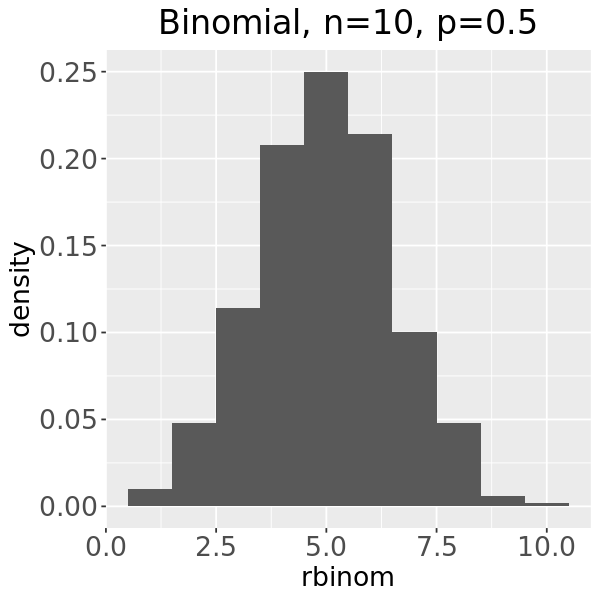

In [9]:
gf1 + geom_histogram(bins = 10) + 
ggtitle('Binomial, n=10, p=0.5') +
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('rbinom')

**Obsérvese que es simétrica la distribución en este caso.**

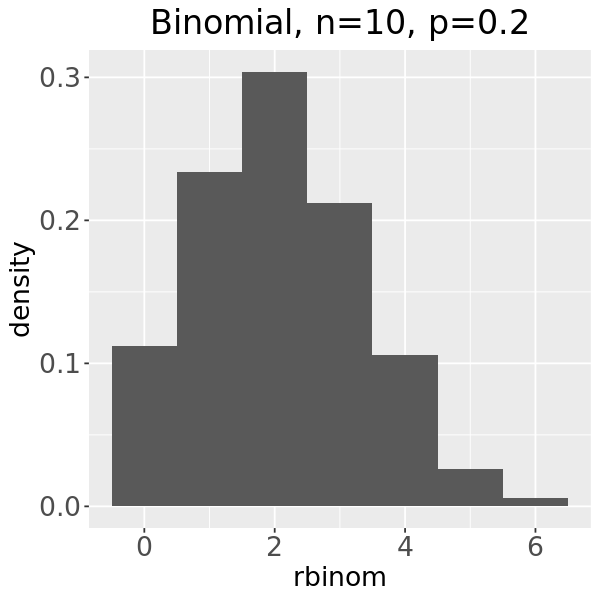

In [10]:
gf2 + geom_histogram(bins = 7) + 
ggtitle('Binomial, n=10, p=0.2') +
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('rbinom')

**Obsérvese que está sesgada a la derecha la distribución en este caso.**

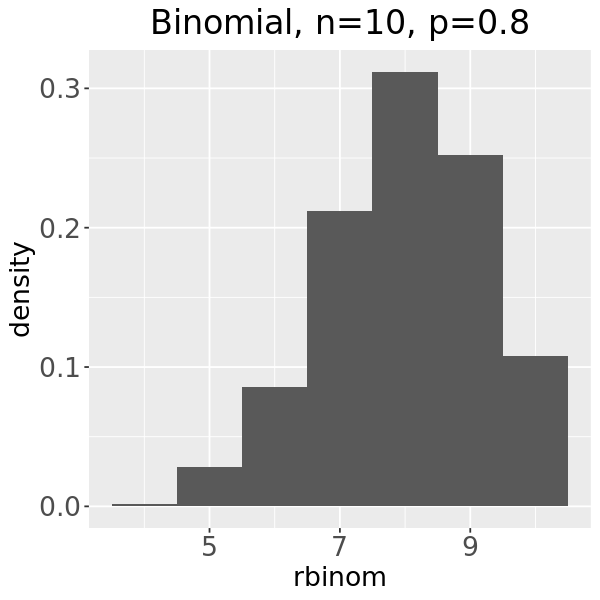

In [11]:
gf3 + geom_histogram(bins = 7) + 
ggtitle('Binomial, n=10, p=0.8') +
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('rbinom')

**Obsérvese que está sesgada a la izquierda la distribución en este caso.**

### Ejemplos

1) La probabilidad de obtener $4$ veces el número tres en $10$ lanzamientos de un dado se calcula poniendo: $n = 10,k = 4$ y $p = \frac{1}{6}$ para obtener: $$P(X=4) = \binom{10}{4}\left(\frac{1}{6}\right)^4\left(\frac{5}{6}\right)^{10-4} \approx 0.0543.$$

**en R...**

In [12]:
dbinom(4,10,1/6)

[1] 0.05426588

El número medio de tres que se obtienen en $10$ lanzamientos es de:

$$\mu = np = 10*\frac{1}{6} = \frac{5}{3} \approx 1.67.$$

con desviación estándar:

$$\sigma = \sqrt{np(1-p)} = \sqrt{10*\frac{1}{6}*\frac{5}{6}} \approx 1.18.$$

2) La probabilidad de que los $5$ pacientes tratados con el medicamento desarrollen hipertensión arterial se calcula poniendo: $n = 5, k = 5$ y $p = 0.1$ para obtener: $$P(X=5)=\binom{5}{5}(0.1)^5(0.9)^0 \approx .00001.$$

**en R ...**

In [13]:
dbinom(5,5,.1)

[1] 1e-05

El número medio de pacientes que desarrollan hipertensión arterial es de: $$ \mu=np=5*0.1=.5$$

con desviación estándar: $$\sigma=\sqrt{np(1-p)} = \sqrt{5*0.1*0.9} \approx 0.67$$

3) Igual que el ejemplo $1$ pero ahora se utiliza $Y = \frac{X}{n}$, entonces $Y$ mide la **proporción** de números tres en $n=10$ lanzamientos de un dado. Por las propiedades de media y desviación estándar se tiene:

* El número medio de la proporción de tres que se obtienen en $10$ lanzamientos es de: $$\mu_Y = \frac{\mu_X}{n} = \frac{np}{n} = p = \frac{1}{6}.$$

* La desviación estándar de la proporción de tres que se obtienen en $10$ lanzamientos es de: $$\sigma_Y = \frac{\sigma_X}{n} = \frac{\sqrt{np(1-p)}}{n} = \sqrt{\frac{np(1-p)}{n^2}} = \sqrt{\frac{p(1-p)}{n}} \approx \frac{1.18}{10}\approx .118$$

---

**Observación** 

Como $\mu_Y = p$, entonces $Y$ (proporción) se nombra estimador insesgado (en promedio no sobreestiman ni subestiman a $p$).

---

**Comentario** 

* Un experimento binomial puede representarse por la siguiente urna con canicas: en la urna colocamos $r$ canicas rojas y $a$ azules. El experimento consiste en extraer repetidamente canicas de la urna, con remplazo, de manera que la urna siempre contiene las mismas canicas. Si al extraer una canica al azar, ésta es roja, entonces se contabiliza como un éxito. La probabilidad de éxito está dada por la **proporción de canicas rojas**, es decir: $$p=\frac{r}{r+a}.$$

    Supongamos que no sabemos de antemano la proporción de canicas de cada color, por lo tanto desconocemos $p$. Para tratar de averiguar esta proporción empezamos a extraer canicas con remplazo. Sea $n$ el número de veces que repetimos este proceso de extracción y $k$ el número de canicas rojas o éxitos que obtenemos. *Jacobo Bernoulli* se dio cuenta de que si $n$ era suficientemente grande, entonces la proporción $\frac{k}{n}$ se parecía cada vez más a la probabilidad p, es decir, a la proporción real de canicas. La prueba formal de este hecho, que nos puede parecer trivial, es uno de los grandes teoremas de la Estadística por su importancia para la inferencia y se conoce como el **Teorema de Bernoulli o la Ley de los Grandes Números**.
    
---

# Normal

**Un poco de historia...**

El matemático y estadístico francés Abraham de Moivre (1667 - 1754) notó que cuando la distribución binomial involucraba una gran número de ensayos (por ejemplo la probabilidad de obtener al menos $60$ caras iguales al lanzar una moneda $100$ veces), su forma podía reproducirse con una curva suave en forma de campana.

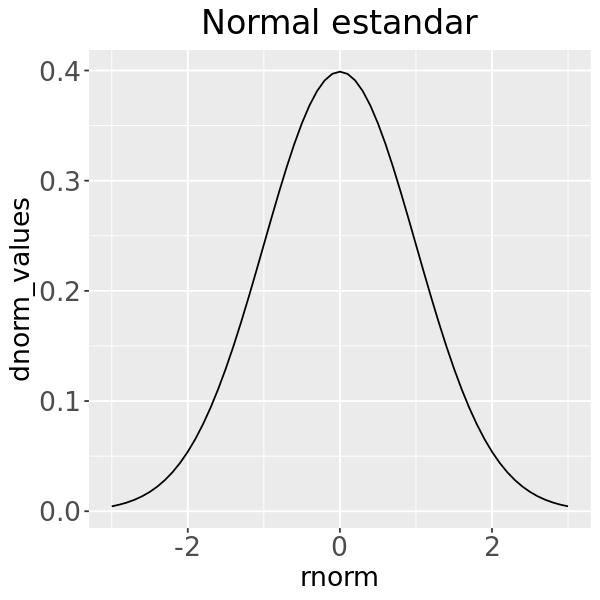

In [14]:
set.seed(2000)
vec <- seq(-3,3,by=.1) 
dnorm_values <- dnorm(vec)  #evaluate dnorm in vec
qplot(vec,dnorm_values,geom='line') +  #qplot is quickplot
ggtitle('Normal estandar') + 
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('rnorm')

In [15]:
set.seed(2000)
n_rbinom<-1000 #number of values
n1<-60 #number of trials
p<-1/2 #probability of success
rbinom_values1 <- rbinom(n_rbinom,n1,p)
dbinom_values1 <- dbinom(rbinom_values1,n1,p) #evaluate dbinom in rbinom_values1

#Increasing number of trials
n2<-100
rbinom_values2 <- rbinom(n_rbinom,n2,p)
dbinom_values2 <- dbinom(rbinom_values2,n2,p)
gf1 <- ggplot(data.frame(x=rbinom_values1,y=dbinom_values1),aes(x=rbinom_values1,y=..density..))
gf2 <- ggplot(data.frame(x=rbinom_values2,y=dbinom_values2),aes(x=rbinom_values2,y=..density..))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



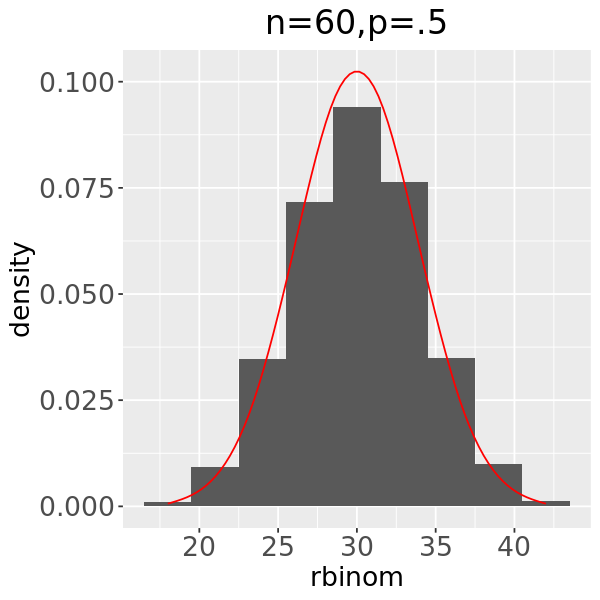

In [16]:
gf1 + geom_histogram(bins=9)+
ggtitle('n=60,p=.5') + 
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('rbinom') + 
geom_smooth(aes(x=rbinom_values1,y=dbinom_values1), colour='red', size=.5)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



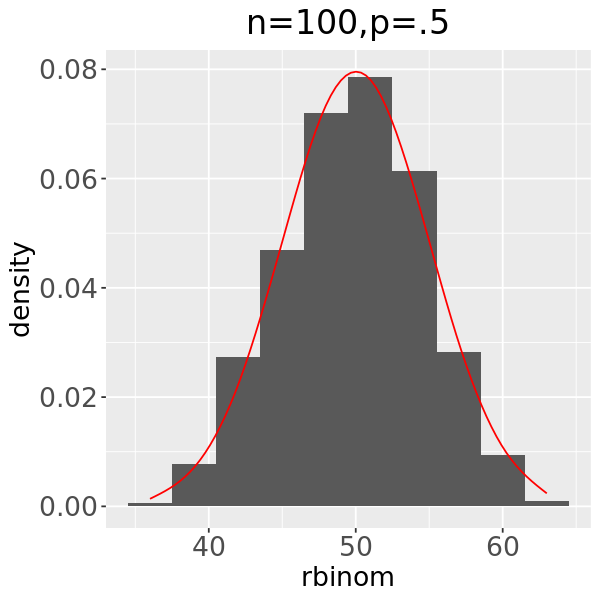

In [17]:
gf2 + geom_histogram(bins=10)+
ggtitle('n=100,p=.5') + 
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('rbinom') + 
geom_smooth(aes(x=rbinom_values2,y=dbinom_values2), colour='red', size=.5)

Y encontró una fórmula para aproximar las probabilidades binomiales cuando se tenía un gran número de ensayos. Esta curva fue descubierta en forma independiente por Pierre S. Laplace (1749 - 1827), en 1778 y por el alemán Carl F. Gauss en 1809. Hoy en día también es conocida como la distribución Gaussiana o campana de Gauss. Entre otras aportaciones, Gauss observó y estudió que los errores en mediciones suelen seguir una distribución normal y los errores pequeños (que producen subestimación de la cantidad real medida) ocurren con mayor frecuencia que los grandes (que producen sobrestimación).

---

**Comentario** 

Otros datos que típicamente están distribuidos normal: las calificaciones de un grupo de estudiantes, el rendimiento de una vaca lechera, la altura de los individuos de una población, el nivel de consumo de un producto, el tiempo dedicado para tomar ciertas decisiones...

---

## Su función de densidad

Está en términos de su $\mu$ y su $\sigma$ y es: $$f(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)$$

La media $\mu$ da el centro de la curva. La desviación estándar $\sigma$, determina el ancho de la misma.

La distribución normal estándar es aquella en la que $\mu = 0 , \sigma = 1$: $$f(x) = \frac{1}{\sqrt{2\pi}}exp\left(-\frac{x^2}{2}\right)$$

In [18]:
set.seed(2000)
vec <- seq(-5,8,by=.1) #number of values
dnorm_values1 <- dnorm(vec) #evaluate density in vec
dnorm_values2 <- dnorm(vec,1,1)
dnorm_values3 <- dnorm(vec,1,2) #mean 1 and standar deviation of 2

df1 <- data.frame(values=dnorm_values1,normal=rep('estandar',NROW(dnorm_values1)))
df2 <- data.frame(values=dnorm_values2,normal=rep('media y desv_est 1',NROW(dnorm_values2)))
df3 <- data.frame(values=dnorm_values3,normal=rep('media 1 y desv_est 2',NROW(dnorm_values3)))
df <- rbind(df1,df2,df3)

In [19]:
head(df)

,values,normal
,<dbl>,<chr>
1,1.486720e-06,estandar
2,2.438961e-06,estandar
3,3.961299e-06,estandar
4,6.369825e-06,estandar
5,1.014085e-05,estandar
6,1.598374e-05,estandar


In [20]:
tail(df)

,values,normal
,<dbl>,<chr>
388,0.0010145240,media 1 y desv_est 2
389,0.0008612845,media 1 y desv_est 2
390,0.0007293654,media 1 y desv_est 2
391,0.0006161096,media 1 y desv_est 2
392,0.0005191406,media 1 y desv_est 2
393,0.0004363413,media 1 y desv_est 2


In [21]:
gf<-ggplot(df,aes(x=rep(vec,3),y=values, group=normal,color=normal))

In [22]:
options(repr.plot.width=9, repr.plot.height=7) #esta línea sólo se ejecuta para jupyterlab con R

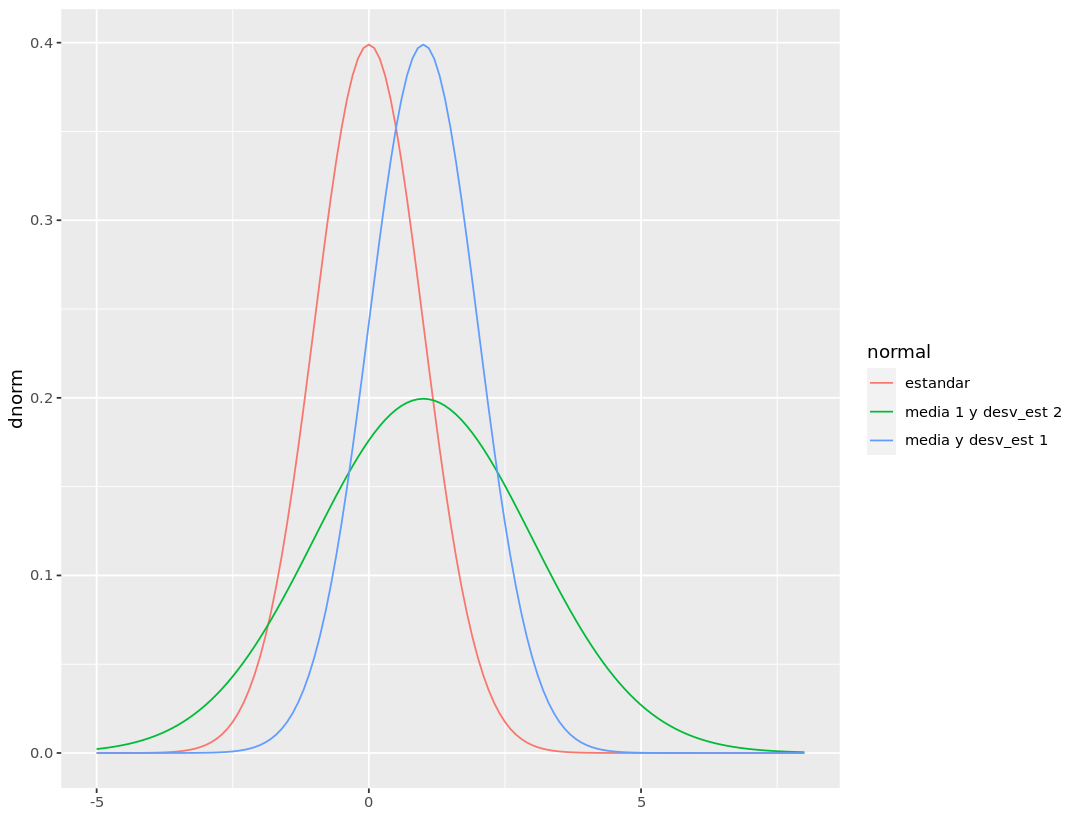

In [23]:
gf + geom_line() + xlab('') + ylab('dnorm')

## Propiedades

* Moda, media y mediana son iguales por su simetría.

* El $68\%$ de los datos se encuentran a una distancia de $\sigma$ de la media, el $95\%$ a una distancia de $1.96\sigma$ ($\approx 2\sigma$) y el $99\%$ a una distancia de $2.58\sigma$ ($\approx 3\sigma$).

(dibujo)?

* Si $X$ se distribuye normal con media $\mu$ y desviación estándar $\sigma$ (escrito: $X\sim N(\mu,\sigma))$ entonces $$Z=\frac{X-\mu}{\sigma},$$ es una variable aleatoria normal con media $0$ y desviación estándar $1$: $Z \sim N(0,1)$.

## Ejemplos

1)Si $X \sim N(1,2)$ calcular: $P(1<X<5)$.

Nuevamente usando: $$P(1 < X < 5) = 1 - P((1 < X < 5)^c) = 1 - P( (1 < X)^c \cup (X <5)^c)=$$

$$1 - P( X \leq 1 \cup 5 \leq X) = 1 - (P(X \leq 1) + P( 5 \leq X))$$

In [24]:
left_value <- 1
right_value <- 5
mean_value <- 1
std_dev <- 2
1-pnorm(left_value,mean_value,std_dev)-pnorm(right_value,mean_value,std_dev, lower.tail = F)

[1] 0.4772499

2)Si $Z \sim N(0,1)$ calcular: $P(Z>0), P(Z<-1), P(-1<Z<0)$

Para el cálculo de $P(Z>0)$:

In [25]:
left_value <- 0
pnorm(left_value,lower.tail=F)

[1] 0.5

Para el cálculo de P(Z<-1):

Por simetría de la normal se tiene: $P(Z<-1)=P(Z>1)$

In [26]:
left_value <- 1
pnorm(left_value,lower.tail=F)

[1] 0.1586553

De igual forma por simetría: $P(-1<Z<0) = P(0<Z<1)$

---

**(Tarea) Ejercicio**

Calcular este caso.

---

# Teorema del límite central

In [27]:
options(repr.plot.width=5, repr.plot.height=5) #esta línea sólo se ejecuta para jupyterlab con R

El hecho de que para un gran número de ensayos una distribución binomial se parezca, cada vez más a una normal, es un resultado parecido al Teorema de Bernoulli o Ley de los Grandes Números. Esencialmente es también una ley de los grandes números. La versión más general de este tipo de resultados es el llamado **Teorema del Límite Central** por el matemático ruso Aleksandr Lyapunov. En términos simples, el teorema nos dice que si tenemos **cierto número de variables aleatorias independientes con la misma distribución**, al aumentar su número, la **distribución de la suma** de sus resultados se **aproxima a una distribución normal**. Esto sucede **independientemente de cual sea la distribución original de las variables.**

El resultado del teorema aplica si cambiamos la palabra suma por **media**. Podemos, por ejemplo, iniciar con una distribución uniforme, tomar muestras aleatorias de tamaño dos y calcular sus medias. Después procedemos con muestras de tamaño tres, cuatro y así sucesivamente aumentamos el tamaño de la muestra. La **distribución de estas medias se aproxima a una normal con la misma media de la distribución original**. **La varianza de esta distribución normal disminuye conforme aumentamos el tamaño de la muestra**.

---

**Nota** 

El segundo momento de la distribución de la variable aleatoria que será sumada debe ser finito.

---

### Ejemplo

Lanzamos **un dado** $100$ veces y hacemos un histograma con los resultados. Después tomamos **dos dados** y los lanzamos $50$ veces. **Sumamos** los números de las dos caras que aparecen en cada lanzamiento y realizamos un histograma con ellos. Tomamos ahora **tres dados** y lanzamos los tres juntos $50$ ocasiones. **Sumamos** los números de las tres caras que aparecen en cada lanzamiento y realizamos un histograma con los resultados. Las siguientes figuras muestran estos histogramas. Visualmente observamos como la **distribución de la suma de las caras tiende a ser normal**.

Caso de **un dado**

In [30]:
set.seed(2000)
n_sample<-100
prob<-rep(1/6,6)
die <-sample(1:6,size=n_sample, replace=T,prob=prob)
gf<-ggplot(data.frame(valores=die),aes(x=die))

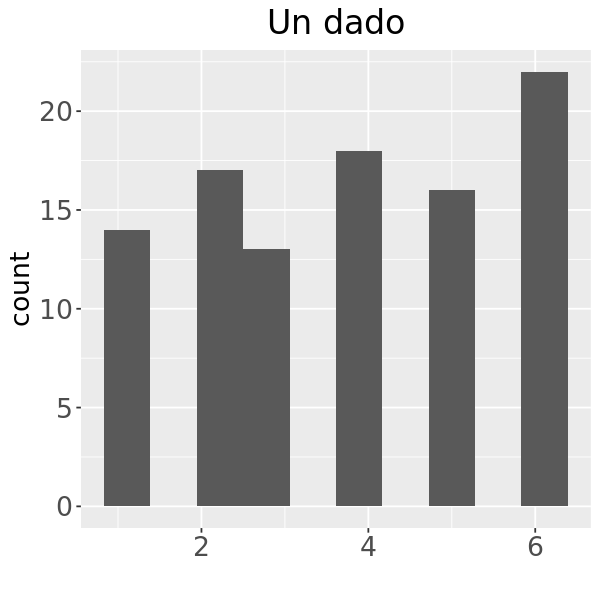

In [31]:
gf + geom_histogram(bins = 10)+
ggtitle('Un dado') +
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('')

Caso de **dos dados**

In [32]:
set.seed(2000)
n_sample<-100
prob<-c(1,2,3,4,5,6,5,4,3,2,1)/36
sum<-2:12
two_dice<-sample(sum,n_sample,prob=prob,replace=T)
gf<-ggplot(data.frame(valores=two_dice),aes(x=two_dice))

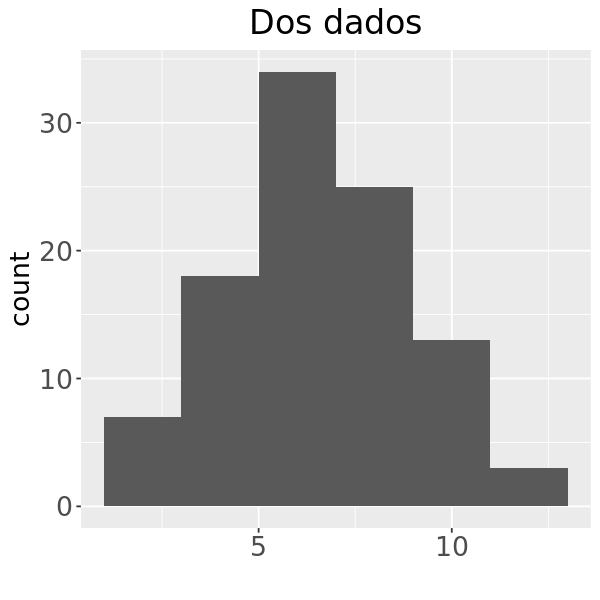

In [33]:
gf + geom_histogram(bins = 6)+
ggtitle('Dos dados') +
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('')

Caso de **tres dados**

---

**(Tarea) Ejercicio**

Calcular este caso utilizando `set.seed(2000)`, `sample`, `ggplot2`.

---

**(Solución)** La gráfica se ve así:

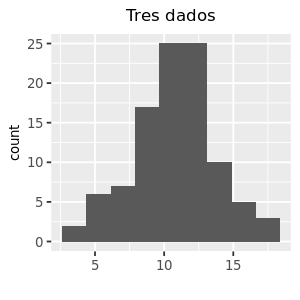

In [34]:
gf + geom_histogram(bins = 9)+
ggtitle('Tres dados') +
theme(plot.title = element_text(size=10, hjust = 0.5),
      axis.text=element_text(size=8),
      axis.title=element_text(size=8)) +
xlab('')

**Promedios**

Caso de **dos dados**

In [34]:
set.seed(2000)
n_sample <- 100
prob <- c(1,2,3,4,5,6,5,4,3,2,1)/36
mean_value <- (2:12)/2
two_dice <- sample(mean_value,n_sample,prob=prob,replace=T)
gf <- ggplot(data.frame(valores=two_dice),aes(x=two_dice))

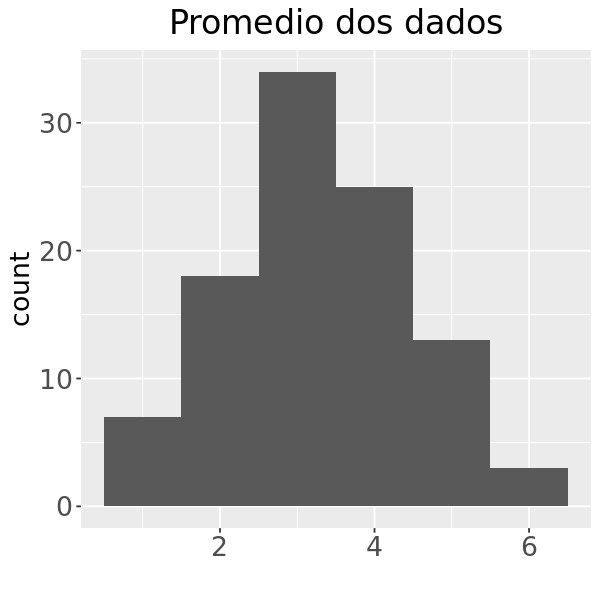

In [35]:
gf + geom_histogram(bins = 6)+
ggtitle('Promedio dos dados') +
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('')

Caso de **tres dados**

---

**(Tarea) Ejercicio**

Calcular este caso utilizando `set.seed(2000)`, `sample`, `ggplot2`.

---

**(Solución)** La gráfica se ve así:

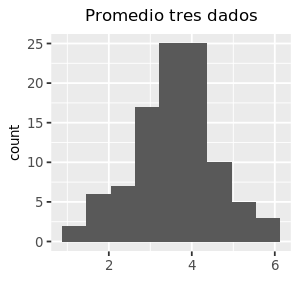

In [38]:
gf + geom_histogram(bins = 9)+
ggtitle('Promedio tres dados') +
theme(plot.title = element_text(size=10, hjust = 0.5),
      axis.text=element_text(size=8),
      axis.title=element_text(size=8)) +
xlab('')

Estos histogramas convergen a los de una distribución normal con media de $3.5$, igual a la de la distribución uniforme original.

# Distribución muestral de la media

Supongamos que tenemos una población y consideremos todas las posibles muestras de tamaño $n$ de la misma. Para cada una de estas muestras puede calcularse la media y obtenerse una distribución muestral de medias. Por el teorema del límite central, sabemos que si las muestras son suficientemente grandes, esta distribución se aproximará por una distribición normal. El siguiente resultado nos proporciona la media y la desviación estándar para esta distribución muestral.

Considérese una población cuya media es $\mu$ y desviación estándar $\sigma$. Las medias $\bar{X}$ de las muestras aleatorias de tamaño $n$ siguen una distribución con media $\mu$ y desviación estándar $\frac{\sigma}{\sqrt{n}}$. Si $n$ es suficientemente grande (usualmente $n \geq 30),$entonces, aproximadamente se tiene que, $$\bar{X} \sim N\left(\mu,\frac{\sigma}{\sqrt{n}}\right).$$

Esto es, las medias están distribuidas normalmente y la desviación estándar de las medias de la muestra: $\frac{\sigma}{\sqrt{n}}$, decrece conforme $n$ crece.

### Ejemplo

Una muestra aleatoria de $36$ individuos se toma de una población cuyo ingreso mensual promedio es de $\$25,000$ con una desviación estándar de $\$6000$. ¿Cual es la probabilidad de que la media de la muestra esté entre $\$23,000$ y $\$27,000$?

Buscamos: $P(23000 < \bar{X} < 27000)$ con $\bar{X} \sim N\left(25000,\frac{6000}{\sqrt{36}}\right)$, entonces:

In [33]:
left_value <- 23000
right_value <- 27000
mu <- 25000
sigma <- 6000/sqrt(36)
1-pnorm(left_value, mu,sigma)-pnorm(right_value,mu,sigma,lower.tail =F)

[1] 0.9544997

que es consistente con el hecho que aproximadamente el $95\%$ del área se encuentra a dos desviaciones estándar de la media:

In [34]:
mu+sigma*1.96
mu-sigma*1.96

[1] 26960

[1] 23040

# (Tarea) Ejercicios

**Nota: Varios de los siguientes ejercicios tienen su solución en las referencias dadas al inicio de la nota. Se sugiere resolverlos por su cuenta y posteriormente compararlos con sus respectivas soluciones.**

1) Supóngase que el tiempo (en minutos) que una persona espera el Metrobús los días de semana sigue una distribución uniforme dada por, $$f(x) = \begin{cases}
\frac{1}{12} & \text{si } 0 \leq x \leq 12,\\
0 & \text{en otro caso}
\end{cases}$$

a) ¿Cuál es la probabilidad que una persona espere menos de $6$ minutos?.

b) ¿Su tiempo medio de espera? ¿su desviación estándar?.

2) Considérese lanzamientos de una moneda no cargada. Sea $X$ la variable aleatoria que cuenta el número de águilas en $10$ lanzamientos. Calcular en *R* la probabilidad $P(X \geq 3)$ con la función `pbinom` y `dbinom`, el número medio de águilas y su desviación estándar.

3) Considérese una población de votantes en la ciudad de México. Se reporta que la proporción de votantes que favorecen al candidato del partido Naranja es igual a $0.40$. Dada una muestra aleatoria de $200$ votantes, ¿cuál es la probabilidad de que más de la mitad de ellos tengan intención de voto por el candidato naranja? Usar:

a)`pbinom`

b) El teorema del límite central y `pnorm` considerando lo que se conoce como corrección por continuidad: si $B$ es variable aleatoria binomial con $\mu$ y $\sigma$ entonces $P(B=k) = P(k-0.5<X<k+0.5)$ con $X$ variable aleatoria normal $N(\mu,\sigma)$ y $k$ un número entero no negativo.

4) Supongamos que el ingreso anual de un imigrante mexicano en los EUA se distribuye de forma normal con una media de $\$30,000$ y una desviación estándar de $\$10,000$ dólares. ¿Cuál es la probabilidad de que un inmigrante mexicano gane menos de $\$20,000$ dólares anuales? ¿Cuál es la probabilidad de que su ingreso sea mayor a los $\$50,000$ dólares anuales? (usar *R*).